In [1]:
import os
import math
import quandl
import itertools
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
KNeighboursClassifier = KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
%matplotlib inline
# Your code goes here

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
import requests

In [3]:
import json

In [5]:
#quandl database query through API
quandl.ApiConfig.api_key = 'gTmSNjbQR-8Q5U9pukHX'
quandl.get('BITFINEX/BTCEUR',collapse="monthly")


,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2017-11-30,9647.3,7596.798998,8243.85,8268.6,8241.0,8246.7,8856.520924
2017-12-31,9768.0,9033.100000,9768.25,9768.0,9767.8,9768.7,2370.582143


In [6]:
#downloaded dataset for daily price
data_path = os.path.join(os.getcwd(), 'datasets', 'cryptocurrencyhistoricaldata','ethereum.csv')
train_A = pd.read_csv(data_path, delimiter = ';')

In [7]:
#general coin informaiton from crypto compare
response = requests.get("https://www.cryptocompare.com/api/data/coinlist/")
coinInfo = response.json()
coinInfo = coinInfo['Data']
json.dumps(coinInfo)
coinInfo = pd.read_json(json.dumps(coinInfo),orient='index')

In [8]:
#retriving (eth) price from crypto compare
parameters = {"fsym":"ETH","tsym":"BTC"}
response = requests.get("https://min-api.cryptocompare.com/data/histominute",params=parameters)
ethPriceByMin = response.json()
ethPriceByMin = ethPriceByMin["Data"]
ethPriceByMin = pd.read_json(json.dumps(ethPriceByMin),orient="columns")


In [10]:
# retriveing from GDAX using unofficial client package
#importing GDAX package from local directory
import sys

sys.path.insert(0,'C:/Users/Yong Zhen Yu/Documents/gdax-python/gdax')
sys.path.insert(0,'C:/Users/Yong Zhen Yu/Documents/gdax-python')

import gdax

public_client = gdax.PublicClient()

len(public_client.get_product_historic_rates("ETH-USD"))

401

In [34]:
# retriveing from Kraken using unofficial client package Krakenex
# attempting to retrive directly from github
#kraken API seems to be rather unstable


import krakenex

k = krakenex.API()

#gets the price pair "keys to use below
k.query_public("AssetPairs")["result"].keys()

parameters = {"pair":"XETHZEUR"}

#draws live order book
k.query_public("Depth",parameters)

{'error': [],
 'result': {'XETHZEUR': {'asks': [['380.96000', '165.083', 1512571884],
    ['380.97000', '200.000', 1512571131],
    ['380.98000', '200.000', 1512571500],
    ['380.99000', '200.000', 1512571585],
    ['381.00000', '209.950', 1512571850],
    ['381.02000', '0.680', 1512570741],
    ['381.05000', '200.680', 1512570893],
    ['381.10000', '400.000', 1512570690],
    ['381.20000', '400.000', 1512571046],
    ['381.49000', '0.680', 1512571839],
    ['381.50000', '3.286', 1512571418],
    ['381.58000', '204.549', 1512571808],
    ['381.65000', '10.300', 1512571336],
    ['381.71000', '1.361', 1512571882],
    ['381.76000', '5.000', 1512570926],
    ['381.77000', '30.933', 1512570234],
    ['381.78000', '0.056', 1512569711],
    ['381.81000', '0.681', 1512571871],
    ['381.90000', '0.200', 1512562844],
    ['381.96000', '0.335', 1512565253],
    ['382.00000', '1080.498', 1512570401],
    ['382.02000', '0.336', 1512564055],
    ['382.05000', '25.000', 1512571864],
    ['382.06

In [4]:
#retriveing data form bitcoinity.org

response = requests.get("https://data.bitcoinity.org/markets/bidask_sum/24h/USD/bitfinex?bp=1&bu=c&r=minute&t=m")

In [9]:
from bs4 import BeautifulSoup

In [10]:
bitoinityPage = BeautifulSoup(response.content,'html.parser')

In [15]:
chartParams = {"data_type":"bidask_sum","currency":"USD","exchange":"bitfinex","compare":"no","bidask_percent":"1","bidask_unit":"curr","function":"none","timespan":"24h","groups_count":10,"resolution":"minute","chart_type":"multi","smoothing":"linear","scale_type":"lin"}

In [19]:
#post request to chart_data with chartParams, gets back data
response = requests.post("https://data.bitcoinity.org/chart_data", data=chartParams)
response.content

b'{"data":[{"key":"asks","values":[[1512495540000,4446268.24543722],[1512495600000,4434707.79704202],[1512495660000,4841208.80538009],[1512495720000,5113372.4262299],[1512495780000,4848692.93524843],[1512495840000,5309319.50584695],[1512495900000,5796214.95535997],[1512495960000,5669034.91071457],[1512496020000,5694735.96355588],[1512496080000,6003544.77308402],[1512496140000,5985786.60273374],[1512496200000,5650506.04453919],[1512496260000,5507841.42926839],[1512496320000,8254610.75554941],[1512496380000,4509563.18444628],[1512496440000,4301165.84765586],[1512496500000,4231532.05996424],[1512496560000,3834271.79309995],[1512496620000,3425068.18528938],[1512496680000,2778221.75498164],[1512496740000,2788054.23520452],[1512496800000,2520348.5439776],[1512496860000,2678853.006586],[1512496920000,2619323.65408175],[1512496980000,3222835.20256164],[1512497040000,4358104.88055719],[1512497100000,4679954.87185537],[1512497160000,4581022.71543808],[1512497220000,3968074.09485881],[15124972800

In [14]:
req = requests.Request?


In [11]:
print(bitoinityPage.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Bitcoinity.org
  </title>
  <link href="//static.bitcoinity.org/assets/data-screen-b711e36db928164740bfd2e46e697736.css" media="screen" rel="stylesheet" type="text/css"/>
  <link href="//static.bitcoinity.org/assets/data-print-ed1a301e961af17ff5b75c2fd441fa10.css" media="print" rel="stylesheet" type="text/css"/>
  <script src="//static.bitcoinity.org/assets/data-1cf3554a12fc117a95b8da73b5fda480.js" type="text/javascript">
  </script>
  <link href="/data_favicon.ico" rel="icon" type="image/x-icon"/>
  <script src="//static.bitcoinity.org/assets/c3-175a720d1950508bb718795d2d0d8e16.js" type="text/javascript">
  </script>
  <link href="//static.bitcoinity.org/assets/c3-e33e3766d485785cb6ba50a4993fb0a3.css" media="screen" rel="stylesheet" type="text/css"/>
  <meta content="authenticity_token" name="csrf-param"/>
  <meta content="ogl4qX9e5Qp7fme+xujScdZlE0/s3HlkAoH+KPUVb/I=" name="csrf-token"/>
 </head>
 <body>
  <div class="main_title row-fluid">


In [4]:
from bitcoinity import BitcoinityScraper

In [5]:
bts = BitcoinityScraper()

In [7]:
chartData = bts.get_chart_data()

In [12]:
chartData = chartData.decode()

json_acceptable_string = chartData.replace("'","\"")

dict_format = json.loads(json_acceptable_string)

In [31]:
response = requests.get("https://tradeblock.com/api/markets/ohlcv/bfnx/eth-usd/?start=1509528977000&end=1512768977000&period=1h")


In [33]:
response.text

'[[1509530400.0, 301.3, 301.45, 295.89, 297.35, 12147.845372], [1509534000.0, 297.41, 298.41, 294.0, 296.0, 11620.899493], [1509537600.0, 296.04, 298.72, 294.06, 298.49, 4912.214194], [1509541200.0, 298.49, 298.78, 296.74, 297.85, 4458.623012], [1509544800.0, 297.85, 301.8, 297.84, 299.96, 13093.977394], [1509548400.0, 299.96, 301.17, 296.48, 297.21, 7815.614876], [1509552000.0, 297.19, 298.0, 295.3, 296.46, 3494.317646], [1509555600.0, 296.59, 296.59, 294.35, 295.11, 4838.315381], [1509559200.0, 295.18, 297.0, 295.02, 295.92, 2604.373271], [1509562800.0, 295.8, 298.88, 295.52, 296.51, 5612.777935], [1509566400.0, 296.51, 297.88, 295.25, 296.56, 6686.113924], [1509570000.0, 296.73, 297.9, 294.1, 294.68, 9855.788441], [1509573600.0, 294.74, 295.2, 289.58, 292.1, 13876.172048], [1509577200.0, 292.1, 292.91, 287.04, 288.6, 8303.15081], [1509580800.0, 288.84, 292.9, 286.66, 287.3, 20590.603705], [1509584400.0, 287.11, 290.0, 275.21, 288.08, 39618.304377], [1509588000.0, 289.19, 293.01, 285

In [3]:
start_time = 1509528977

In [4]:
import datetime

In [5]:
d = datetime.datetime.fromtimestamp(start_time)

In [6]:
d.timestamp()*1000

1509528977000.0

In [1]:
from tradeblock import TradeblockScraper
tbs = TradeblockScraper()

Params:  {'page_to_draw': 'ohlcv', 'exchange': 'bfnx', 'curr_pair': 'eth-usd', 'start_time': datetime.datetime(2017, 11, 1, 9, 36, 17), 'end_time': datetime.datetime(2017, 12, 8, 21, 36, 17)}


In [2]:
tbs.get_data()

IndexError: tuple index out of range

In [1]:
from app import app
from app.apihandlers import tradeblock



ModuleNotFoundError: No module named 'classstructure'

In [5]:
from app.apihandlers import tradeblock

In [7]:
from app.apihandlers.tradeblock import *

In [8]:
tb_scraper = TradeblockScraper()

Params:  {'page_to_draw': 'ohlcv', 'exchange': 'bfnx', 'curr_pair': 'eth-usd', 'start_time': datetime.datetime(2017, 11, 1, 9, 36, 17), 'end_time': datetime.datetime(2017, 12, 8, 21, 36, 17)}


In [9]:
tb_scraper.get_params()

{'curr_pair': 'eth-usd',
 'end_time': datetime.datetime(2017, 12, 8, 21, 36, 17),
 'exchange': 'bfnx',
 'page_to_draw': 'ohlcv',
 'start_time': datetime.datetime(2017, 11, 1, 9, 36, 17)}

In [17]:
import json

In [18]:
data = tb_scraper.get_data()

In [24]:
data

b'[[1509530400.0, 301.3, 301.45, 295.89, 297.35, 12147.845372], [1509534000.0, 297.41, 298.41, 294.0, 296.0, 11620.899493], [1509537600.0, 296.04, 298.72, 294.06, 298.49, 4912.214194], [1509541200.0, 298.49, 298.78, 296.74, 297.85, 4458.623012], [1509544800.0, 297.85, 301.8, 297.84, 299.96, 13093.977394], [1509548400.0, 299.96, 301.17, 296.48, 297.21, 7815.614876], [1509552000.0, 297.19, 298.0, 295.3, 296.46, 3494.317646], [1509555600.0, 296.59, 296.59, 294.35, 295.11, 4838.315381], [1509559200.0, 295.18, 297.0, 295.02, 295.92, 2604.373271], [1509562800.0, 295.8, 298.88, 295.52, 296.51, 5612.777935], [1509566400.0, 296.51, 297.88, 295.25, 296.56, 6686.113924], [1509570000.0, 296.73, 297.9, 294.1, 294.68, 9855.788441], [1509573600.0, 294.74, 295.2, 289.58, 292.1, 13876.172048], [1509577200.0, 292.1, 292.91, 287.04, 288.6, 8303.15081], [1509580800.0, 288.84, 292.9, 286.66, 287.3, 20590.603705], [1509584400.0, 287.11, 290.0, 275.21, 288.08, 39618.304377], [1509588000.0, 289.19, 293.01, 28

In [28]:
data = json.loads(data)

In [29]:
json.JSONEncoder().encode(data)

'[[1509530400.0, 301.3, 301.45, 295.89, 297.35, 12147.845372], [1509534000.0, 297.41, 298.41, 294.0, 296.0, 11620.899493], [1509537600.0, 296.04, 298.72, 294.06, 298.49, 4912.214194], [1509541200.0, 298.49, 298.78, 296.74, 297.85, 4458.623012], [1509544800.0, 297.85, 301.8, 297.84, 299.96, 13093.977394], [1509548400.0, 299.96, 301.17, 296.48, 297.21, 7815.614876], [1509552000.0, 297.19, 298.0, 295.3, 296.46, 3494.317646], [1509555600.0, 296.59, 296.59, 294.35, 295.11, 4838.315381], [1509559200.0, 295.18, 297.0, 295.02, 295.92, 2604.373271], [1509562800.0, 295.8, 298.88, 295.52, 296.51, 5612.777935], [1509566400.0, 296.51, 297.88, 295.25, 296.56, 6686.113924], [1509570000.0, 296.73, 297.9, 294.1, 294.68, 9855.788441], [1509573600.0, 294.74, 295.2, 289.58, 292.1, 13876.172048], [1509577200.0, 292.1, 292.91, 287.04, 288.6, 8303.15081], [1509580800.0, 288.84, 292.9, 286.66, 287.3, 20590.603705], [1509584400.0, 287.11, 290.0, 275.21, 288.08, 39618.304377], [1509588000.0, 289.19, 293.01, 285

In [15]:
from app import dbmanager

In [34]:
dbmanager.static_update_collection("tradeblock",[{"key":1},{"key":123}],123)

In [2]:
import json
from app.apihandlers import bitcoinity

In [3]:
scraper = bitcoinity.BitcoinityScraper()

In [4]:
data = scraper.get_data()

In [14]:
data['data'][1]['values']

[[1514897040000, 1323081.84379834],
 [1514897100000, 1236164.03364638],
 [1514897160000, 1039791.31093649],
 [1514897220000, 1481753.91420168],
 [1514897280000, 1666999.72075593],
 [1514897340000, 1621959.97685269],
 [1514897400000, 1580862.98494195],
 [1514897460000, 1374178.55249566],
 [1514897520000, 1238618.75688308],
 [1514897580000, 1678000.78385813],
 [1514897640000, 1695940.0297125],
 [1514897700000, 1393249.0949358],
 [1514897760000, 1452266.44069184],
 [1514897820000, 1247471.04822877],
 [1514897880000, 1601864.48846226],
 [1514897940000, 1317382.71516076],
 [1514898000000, 1570614.52049475],
 [1514898060000, 1405502.25736963],
 [1514898120000, 1504913.18722817],
 [1514898180000, 1718862.04683546],
 [1514898240000, 1751337.4143656],
 [1514898300000, 2037671.25965255],
 [1514898360000, 1769123.50020365],
 [1514898420000, 1844231.1305788],
 [1514898480000, 1593631.40044655],
 [1514898540000, 1416815.70291314],
 [1514898600000, 1501164.86070403],
 [1514898660000, 1344896.4812514

In [16]:
ask = data['data'][0]['values']
bid = data['data'][1]['values']

In [15]:
output = []

In [26]:
for index, value in enumerate(ask):
    if value[0] == bid[index][0]:
        output.append({value[0]:value[1]})

In [5]:
import gdax, time
order_book = gdax.order_book.OrderBook('BTC-USD')
order_book.start()
time.sleep(10)
order_book.close()

TypeError: __init__() got an unexpected keyword argument 'product_id'

In [65]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets','CryptoCurrencyHistoricalData', 'ethereum.csv')
ethereum_prices = pd.read_csv(data_path, delimiter = ';')



In [69]:
ethereum_prices

,Date,Open,High,Low,Close,Volume,MarketCap
0,2017-11-22,360.310000,381.420000,360.150000,380.650000,800819000,34544000000
1,2017-11-21,367.440000,372.470000,350.690000,360.400000,949912000,35220200000
2,2017-11-20,354.090000,372.140000,353.290000,366.730000,807027000,33933400000
3,2017-11-19,347.400000,371.290000,344.740000,354.390000,1181530000,33284900000
4,2017-11-18,331.980000,349.620000,327.690000,347.610000,649639000,31800700000
5,2017-11-17,330.170000,334.960000,327.520000,332.390000,621733000,31620300000
6,2017-11-16,333.440000,336.160000,323.610000,330.920000,797254000,31927300000
7,2017-11-15,337.960000,340.910000,329.810000,333.360000,722666000,32353200000
8,2017-11-14,316.760000,340.180000,316.760000,337.630000,1069680000,30317300000
9,2017-11-13,307.020000,328.420000,307.020000,316.720000,1041890000,29379000000


In [8]:
import datetime

In [45]:
date = ethereum_prices['Date']

In [47]:
type(date[0])

datetime.date

In [67]:
for index, row in ethereum_prices.iterrows():
    date = ethereum_prices['Date'].get_value(index)
    year = int(date[-4:])
    month = int(date[-7:-5])
    day = int(date[:2])
    ethereum_prices.Date[index] = datetime.date(year, month, day)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [70]:
X = ethereum_prices['Date']
y = ethereum_prices['Open']

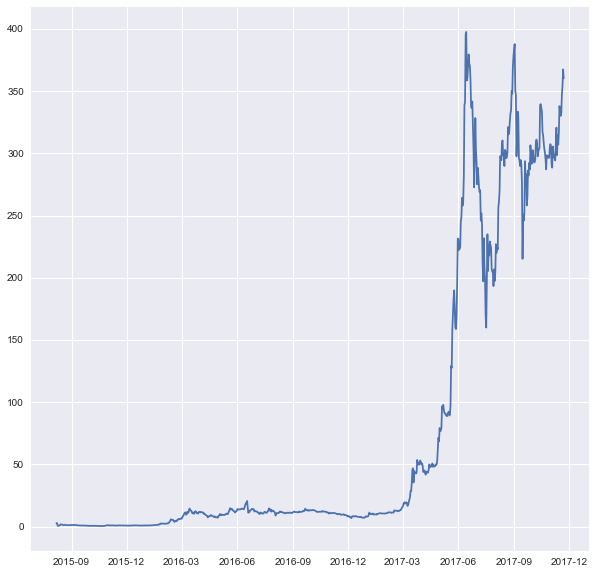

In [72]:
fig = plt.figure(figsize=(10,10))
plt.plot(X,y)
plt.show()

In [74]:
def load_and_format(database_name):
    # Load the dataset from 'CryptoCurrencyHistoricalData
    data_path = os.path.join(os.getcwd(), 'datasets','CryptoCurrencyHistoricalData', database_name + '.csv')
    data = pd.read_csv(data_path, delimiter = ';')
    for index, row in data.iterrows():
        date = row.Date
        year = int(date[-4:])
        month = int(date[-7:-5])
        day = int(date[:2])
        data.Date[index] = datetime.date(year, month, day)
    return data

In [76]:
eth = load_and_format('ethereum')
ardor = load_and_format('ardor')
dash = load_and_format('dash')
factom = load_and_format('factom')
ltc = load_and_format('litecoin')
xrp = load_and_format('ripple')
qtum = load_and_format('qtum')
btc = load_and_format('bitcoin')
tether = load_and_format('tether')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [80]:
db_arr = [eth,ardor,dash,factom,ltc,xrp,qtum,btc,tether]

In [125]:
def create_vol_per(database):
    volitility_percent = (database.High.subtract(database.Low)).divide(database.Open)*100
    volitility_percent.name = "vol_per"
    database = database.join(volitility_percent)
    return database

In [126]:
db_arr_with_vol = []
for db in db_arr:
    db_arr_with_vol.append(create_vol_per(db))
    

In [135]:
for i in db_arr_with_vol:
    print(i.vol_per.std())

8.306125441069707
11.033843723453504
20.732702769313686
12.492726634277519
8.344916613994377
9.72916322937007
10.981486998530999
4.811364052398234
1.6215620712507093
